### 🤖 머신러닝 데이터 분석이란?

데이터 속에 숨겨진 **패턴**을 찾거나, 미래의 값을 **예측**하는 기술입니다.<br>
크게 정답지 없이 데이터의 특성을 파악하는 **비지도 학습(Unsupervised Learning)** 과<br>
정답지를 보고 학습하여 예측하는 **지도 학습(Supervised Learning)** 으로 나뉩니다.

오늘 실습할 내용은 다음과 같습니다:
1.  **차원 축소 (PCA)**: 복잡한 데이터를 단순하게 압축하여 시각화하기 (비지도)
2.  **군집화 (K-Means)**: 비슷한 성향을 가진 데이터끼리 그룹 만들기 (비지도)
3.  **분류 (KNN)**: 새로운 데이터가 어떤 그룹에 속할지 예측하기 (지도)
4.  **회귀 (Regression)**: 수치형 데이터(예: 소득)를 예측하기 (지도)

### 📉 차원 축소: 복잡한 데이터를 한눈에! (PCA)

데이터의 특성(컬럼)이 많아질수록 시각화나 분석이 어려워집니다.  
**PCA(주성분 분석)** 은 원래 변수들을 조합해 새로운 축(주성분, Principal Components)을 만들고,  
그중 **데이터를 가장 잘 설명하는 상위 성분(PC1, PC2)** 만 선택해 차원을 줄이는 기법입니다.

---

### ✔ PCA 핵심 개념 정리
- PCA는 **원래 변수 개수만큼 주성분(PC)을 생성**할 수 있음  
  (예: 4개 변수 → PC1~PC4 생성 가능)
- 각 PC는 **원래 변수들의 선형 결합**으로 만들어진 완전히 새로운 축
- PC1은 **데이터 분산(정보량)** 을 가장 많이 설명하는 방향  
- PC2는 PC1과 직교하면서 두 번째로 많은 분산을 설명
- 차원 축소에서는 보통 **PC1 + PC2만 선택하여 2차원 시각화**에 활용

---

### 🔬 실습 데이터
- **Iris(붓꽃) 데이터**  
  (꽃받침 길이/너비, 꽃잎 길이/너비 → 원래 특성 4개 → PC1~PC4 생성)

### 🎯 목표
- 4개의 특성을 주성분으로 변환하여  
  **데이터를 가장 잘 표현하는 PC1, PC2를 사용해 2차원 평면에 시각화하기**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 준비 (붓꽃 데이터)
# 실습 편의를 위해 온라인상의 데이터를 불러옵니다.
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# 정답지(species)는 제외하고 순수 데이터만 사용
X = df.drop('species', axis=1)
print("=== 원본 데이터 (상위 5개) ===")
display(X.head())

=== 원본 데이터 (상위 5개) ===


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 2. 데이터 표준화 (StandardScaler)
# 변수마다 단위(cm, mm 등)나 범위가 다르면 분석이 왜곡될 수 있어 0~1 사이로 맞춥니다.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# 3. 차원 축소 (PCA)
# 원래 4개의 변수로부터 생성된 주성분(PC1~PC4) 중
# 데이터 분산을 가장 잘 설명하는 상위 2개 성분(PC1, PC2)만 선택합니다.
pca = PCA(n_components=2)

# PCA는 원래 변수들을 선형 결합해 새로운 축(PC)을 만들며,
# transform 결과는 선택된 PC1, PC2 좌푯값으로 표현됩니다.
transform = pca.fit_transform(df_scaled)

# 선택된 두 개의 주성분(PC1, PC2)을 데이터프레임으로 저장합니다.
df_pca = pd.DataFrame(transform, columns=['PC1', 'PC2'])

print("=== PCA 변환 후 데이터 (2차원) ===")
display(df_pca.head())

=== PCA 변환 후 데이터 (2차원) ===


,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


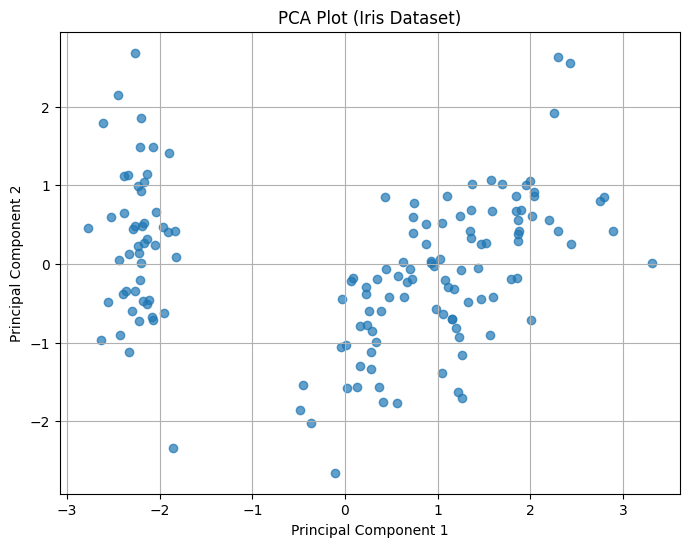

In [ ]:
# 4. 시각화 (산점도)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
plt.title('PCA Plot (Iris Dataset)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### 🧩 K-평균 군집화: 끼리끼리 뭉쳐보자!

정답(품종 이름)을 알려주지 않아도,데이터끼리의 거리를 계산해서 **비슷한 녀석들끼리 그룹(Cluster)** 을 만드는 방법입니다.

* **K**: 만들고 싶은 그룹의 개수
* **Means**: 각 그룹의 중심(평균) 점

우리가 직접 K(그룹 개수)를 정해줘야 하는데,몇 개로 나누는 게 가장 좋을지 알아내는 **엘보우(Elbow) 기법**도 함께 실습해 봅니다.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 준비 및 표준화 (위에서 이어짐)
# df_scaled 변수를 그대로 사용합니다.

In [ ]:
# 2. 군집화 (K-Means)
# 붓꽃 품종이 3개인 것을 알고 있으니, k=3으로 설정해 봅니다.
model = KMeans(n_clusters=3, n_init=10, random_state=123)
model.fit(df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=123)

In [ ]:
# 3. 군집화 결과 확인
print(f"군집 중심점 좌표 (Cluster Centers):\n{model.cluster_centers_}\n")
print(f"각 데이터의 군집 번호 (Labels):\n{model.labels_[:10]} ...\n") # 10개만 출력
print(f"군집 응집도 (Inertia): {model.inertia_}")

군집 중심점 좌표 (Cluster Centers):
[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]

각 데이터의 군집 번호 (Labels):
[1 1 1 1 1 1 1 1 1 1] ...

군집 응집도 (Inertia): 139.82049635974968


In [ ]:
# 4. 시각화를 위해 PCA 결과에 군집 정보 추가
df_pca['cluster'] = model.labels_

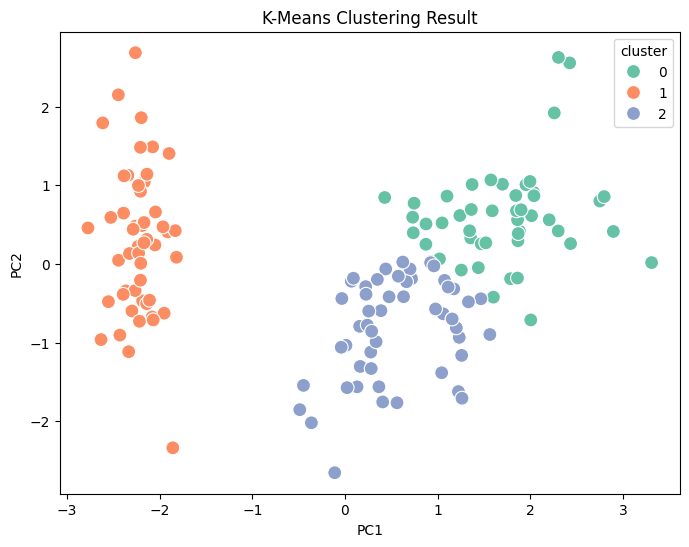

In [ ]:
# 5. 시각화 (색깔로 군집 구분)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='cluster',  # 군집별로 색깔 다르게
    palette='Set2',
    s=100           # 점 크기
)
plt.title('K-Means Clustering Result')
plt.show()

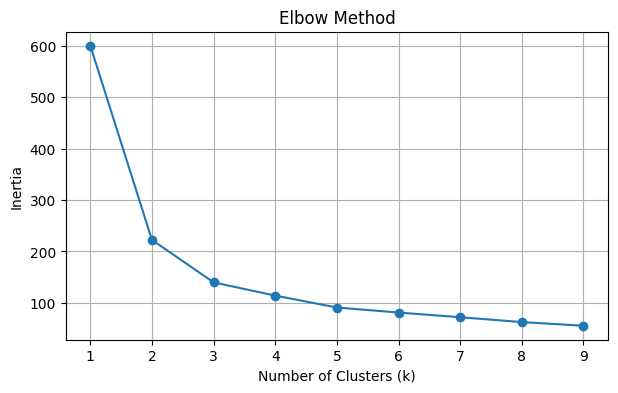

In [ ]:
# 적절한 k값(군집 개수) 찾기
ks = range(1, 10)       # k를 1부터 9까지 바꿔가며 실험
inertias = []           # 응집도(Inertia) 저장할 리스트

for k in ks:
    model = KMeans(n_clusters=k, n_init=10, random_state=123)
    model.fit(df_scaled)
    inertias.append(model.inertia_)

# 그래프 그리기
plt.figure(figsize=(7, 4))
plt.plot(ks, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.grid(True)
plt.show()

# 해석: 그래프가 팔꿈치처럼 뚝 꺾이는 지점(Elbow point)이 최적의 K입니다.
# 여기서는 2 또는 3에서 꺾이는 것을 볼 수 있습니다.

### 🤝 KNN (K-Nearest Neighbors): 유유상종!

"내 친구를 보면 나를 알 수 있다"는 말처럼,<br> 새로운 데이터가 들어왔을 때 **가장 가까운 K명의 이웃**을 살펴보고 다수결로 나의 정체를 판단하는 알고리즘입니다.

* **실습 데이터**: 피마 인디언 당뇨병 데이터 (혈당, 혈압, 나이 등)
* **목표**: 환자의 건강 정보를 보고 당뇨병(1)인지 정상(0)인지 예측해 봅시다.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC

# 1. 데이터 준비 (피마 인디언 당뇨병 데이터)
url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
df = pd.read_csv(url)

# 컬럼명을 소문자로 통일하고, Outcome을 diabetes로 변경 (실습 코드 호환용)
df.columns = [col.lower() for col in df.columns]
df.rename(columns={'outcome': 'diabetes'}, inplace=True)

print("=== 데이터 확인 ===")
display(df.head())
print(f"클래스 비율:\n{df['diabetes'].value_counts()}")

=== 데이터 확인 ===


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


클래스 비율:
diabetes
0    500
1    268
Name: count, dtype: int64


In [ ]:
# 2. 독립변수(X)와 종속변수(y) 분리
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [ ]:
# 3. 데이터 표준화 (KNN은 거리 계산을 하므로 스케일링이 필수!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# 4. 학습용(Train)과 평가용(Test) 데이터 분리
# stratify=y: 학습/평가 셋의 정답 비율을 원본과 동일하게 유지
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=123, stratify=y
)

In [ ]:
# 5. 모델 생성 및 학습 (이웃 수 k=3)
knn = KNC(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 6. 모델 평가 (정확도)
score = knn.score(X_test, y_test)
print(f"모델 정확도(Accuracy): {score:.4f}")

모델 정확도(Accuracy): 0.7403


In [ ]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

# 7. 활용: 새로운 환자 데이터 예측
# [임신8회, 글루코스182, 혈압64, 피부0, 인슐린0, BMI23, 당뇨내력0.67, 나이32]
new_patient = [[8, 182, 64, 0, 0, 23, 0.67, 32]]

# 주의: 예측할 때도 학습 때와 똑같은 스케일러로 변환해야 함
new_patient_scaled = scaler.transform(new_patient)

prediction = knn.predict(new_patient_scaled)
result = "당뇨병(1)" if prediction[0] == 1 else "정상(0)"
print(f"새로운 환자 예측 결과: {result}")

새로운 환자 예측 결과: 당뇨병(1)


## 🧠 생각해 보기: K값에 따라 모델 성능(KNN)은 어떻게 달라질까?

KNN 알고리즘은 **가장 가까운 K개의 이웃**을 보고 분류를 결정합니다.  
따라서 **K값을 어떻게 설정하느냐**가 모델 성능에 큰 영향을 줍니다.

#### **👉 K = 1~20까지 바꾸어가며 정확도(Accuracy)가 어떻게 달라지는지 직접 확인해 보세요!**

k=1일 때 모델 정확도: 0.75%
k=2일 때 모델 정확도: 0.72%
k=3일 때 모델 정확도: 0.74%
k=4일 때 모델 정확도: 0.75%
k=5일 때 모델 정확도: 0.75%
k=6일 때 모델 정확도: 0.73%
k=7일 때 모델 정확도: 0.77%
k=8일 때 모델 정확도: 0.76%
k=9일 때 모델 정확도: 0.77%
k=10일 때 모델 정확도: 0.75%
k=11일 때 모델 정확도: 0.76%
k=12일 때 모델 정확도: 0.77%
k=13일 때 모델 정확도: 0.78%
k=14일 때 모델 정확도: 0.76%
k=15일 때 모델 정확도: 0.77%
k=16일 때 모델 정확도: 0.77%
k=17일 때 모델 정확도: 0.78%
k=18일 때 모델 정확도: 0.76%
k=19일 때 모델 정확도: 0.77%
k=20일 때 모델 정확도: 0.76%


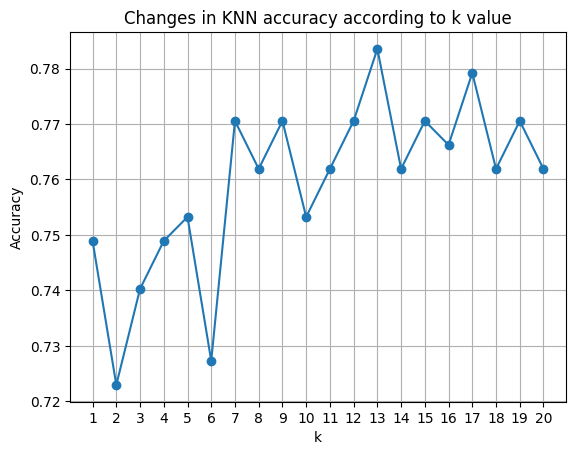

In [ ]:
# 코드 실행: 다양한 k에 대해 정확도 변화 관찰하기
scores = []

for i in range(1, 21):
  knn = KNC(n_neighbors=i)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  print(f"k={i}일 때 모델 정확도: {score:.2f}%")
  scores.append(score)

# 그래프 그리기
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNC

# 그래프 그리기
plt.plot(range(1, 21), scores, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Changes in KNN accuracy according to k value")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

### 📈 회귀분석: 수치 예측하기

원인(독립변수)이 결과(종속변수)에 어떤 영향을 미치는지 분석하여,연속적인 **숫자 값(예: 소득, 집값)** 을 예측하는 방법입니다.

* **실습 데이터**: Prestige (직업의 명성, 교육 수준, 소득 데이터)
* **목표**: 교육 수준(education), 여성 비율(women), 직업 명성(prestige)을 토대로 **소득(income)** 을 예측해 봅니다.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as MAE
import matplotlib.pyplot as plt

# 1. 데이터 준비 (Prestige 데이터)
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/carData/Prestige.csv"
df = pd.read_csv(url)

# 불필요한 첫 번째 컬럼(직업명) 제거 및 결측치 제거
df = df.drop(df.columns[0], axis=1).dropna()

print("=== 데이터 확인 ===")
display(df.head())

# 독립변수(X)와 종속변수(y: 소득) 설정
X = df[['education', 'women', 'prestige']]
y = df['income']

=== 데이터 확인 ===


,education,income,women,prestige,census,type
0,13.11,12351,11.16,68.8,1113,prof
1,12.26,25879,4.02,69.1,1130,prof
2,12.77,9271,15.70,63.4,1171,prof
3,11.42,8865,9.11,56.8,1175,prof
4,14.62,8403,11.68,73.5,2111,prof


In [ ]:
# 2. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

In [ ]:
# 3. 모델 생성 및 학습
model = LR()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 4. 회귀식 확인 (계수와 절편)
print(f"회귀 계수(Coefficients): {model.coef_}")
print(f"절편(Intercept): {model.intercept_:.2f}")
# 해석: 예) education 계수가 양수면, 교육 수준이 높을수록 소득이 높다는 뜻

회귀 계수(Coefficients): [101.23833166 -54.82197109 146.3183818 ]
절편(Intercept): 779.78


In [ ]:
# 5. 모델 평가 (MAE: 평균 절대 오차)
# 실제 소득과 예측 소득이 평균적으로 얼마나 차이나는지 확인
pred = model.predict(X_test)
mae_score = MAE(y_test, pred)
print(f"평균 절대 오차(MAE): {mae_score:.2f} 달러")

평균 절대 오차(MAE): 1867.55 달러


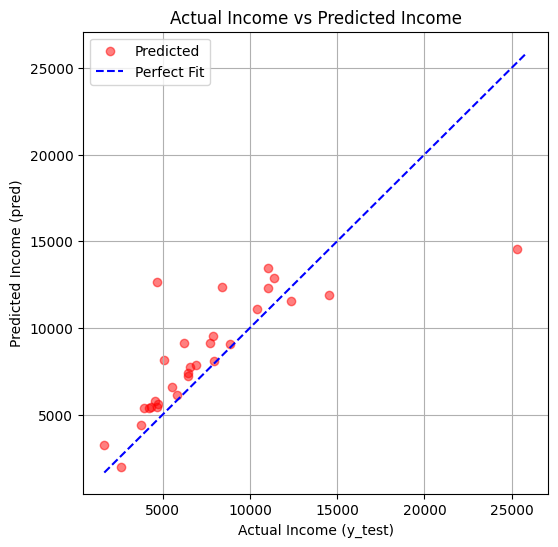

In [ ]:
# 6. 결과 시각화 (실젯값 vs. 예측값)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, pred, color="red", alpha=0.5, label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'b--', label='Perfect Fit') # 대각선
plt.title('Actual Income vs Predicted Income')
plt.xlabel('Actual Income (y_test)')
plt.ylabel('Predicted Income (pred)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 7. 활용: 특정 직업 조건으로 소득 예측해보기
# [교육12년, 여성비율10%, 명성80점]
new_job = pd.DataFrame([[12, 10, 80]], columns=['education', 'women', 'prestige'])
predicted_income = model.predict(new_job)

print(f"해당 직업의 예측 소득: {predicted_income[0]:.2f} 달러")

해당 직업의 예측 소득: 13151.90 달러


## 🧠 생각해 보기: KNN 회귀(Regression)로 소득 예측해보기

앞에서는 **선형 회귀(Linear Regression)** 를 사용하여  
education, women, prestige → income 을 예측해보았습니다.

이번에는 **KNN Regressor(K-Nearest Neighbors 회귀)** 를 사용해 봅시다.  
KNN 회귀는 “비슷한 이웃 K개를 찾아서 그 값의 평균으로 예측하는” 방식입니다.

#### **🔍 실습 목표**

1. KNN Regressor를 사용해 **K=3**일 때 소득(income)을 예측해 본다.  
2. **선형 회귀와 KNN 회귀의 MAE(평균 절대 오차)를 비교**해 본다.  
3. 두 모델의 장단점을 스스로 생각해 본다.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_absolute_error as MAE

# 1. KNN 회귀 모델 생성 (이웃 수 K=3)
knn = KNR(n_neighbors=3)

# 2. 모델 학습
knn.fit(X_train, y_train)

# 3. 예측
pred = knn.predict(X_test)
mae_knn = MAE(y_test, pred)
# 4. 성능 평가 (MAE)

print(f"[KNN 회귀] 평균 절대 오차(MAE): {mae_knn:.2f} 달러")

[KNN 회귀] 평균 절대 오차(MAE): 2852.92 달러
